In [68]:
#Load libraries
import numpy as np
import pandas as pd
from sklearn import metrics
from scipy import stats

In [69]:
#Load dataset
df = pd.read_csv('hcvdat0.csv')

In [70]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [71]:
df.drop(df.columns[0],axis=1,inplace=True)
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [72]:
df.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [73]:
#Check for NULL Values
df[df.isnull().any(axis=1)].head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
121,0=Blood Donor,43,m,48.6,45.0,10.5,40.5,5.3,7.09,NaN,63.0,25.1,70.0
319,0=Blood Donor,32,f,47.4,52.5,19.1,17.1,4.6,10.19,NaN,63.0,23.0,72.2
329,0=Blood Donor,33,f,42.4,137.2,14.2,13.1,3.4,8.23,NaN,48.0,25.7,74.4
413,0=Blood Donor,46,f,42.9,55.1,15.2,29.8,3.6,8.37,NaN,61.0,29.0,71.9
424,0=Blood Donor,48,f,45.6,107.2,24.4,39.0,13.8,9.77,NaN,88.0,38.0,75.1


In [74]:
#drop NULL
df=df.dropna()

In [75]:
l=list(df.columns)
l[0:len(l)-2]

['Category',
 'Age',
 'Sex',
 'ALB',
 'ALP',
 'ALT',
 'AST',
 'BIL',
 'CHE',
 'CHOL',
 'CREA']

In [76]:
import seaborn as sns

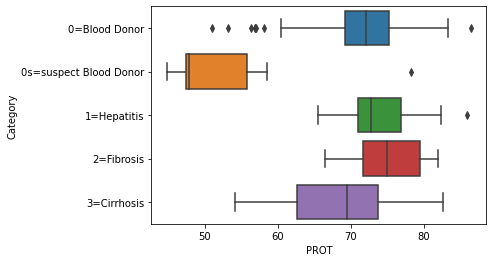

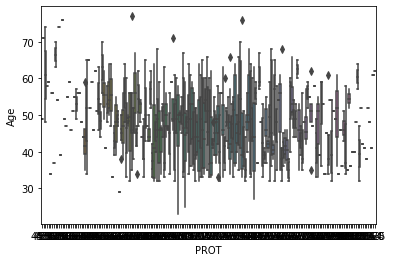

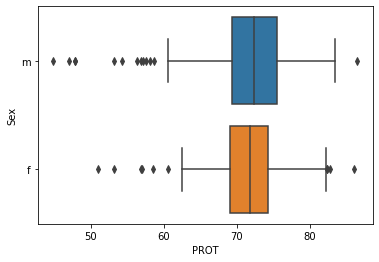

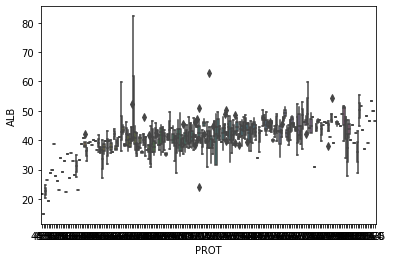

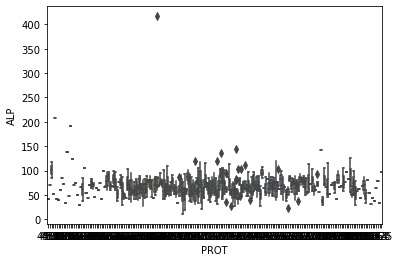

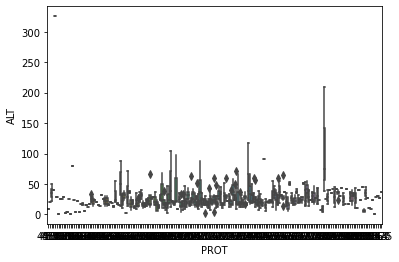

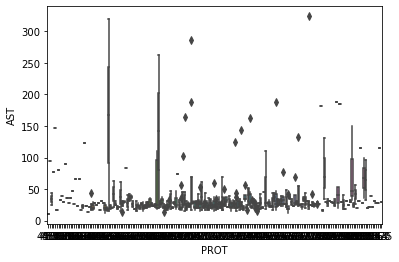

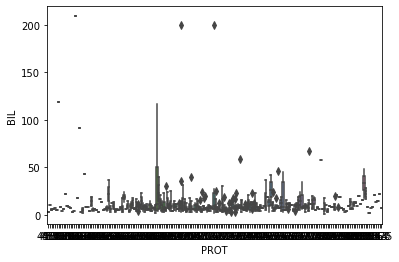

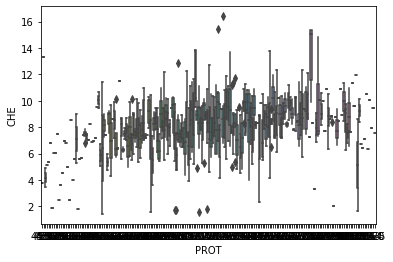

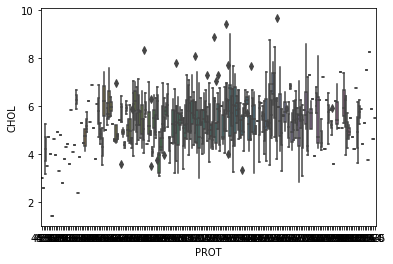

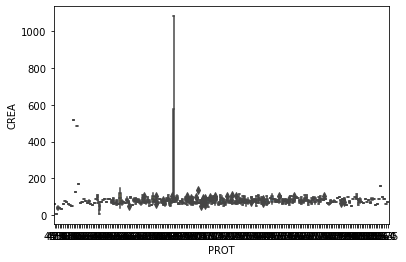

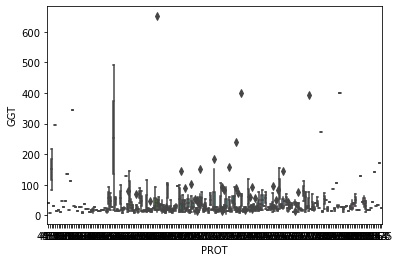

<Figure size 432x288 with 0 Axes>

In [77]:
for i in range(len(l)-1):
    sns.boxplot(x='PROT',y=l[i], data=df)
    plt.figure()

In [78]:
import matplotlib.pyplot as plt

In [79]:
from sklearn.model_selection import train_test_split

In [90]:
X=df[['ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT']]
Y=df['Category']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [91]:
neighbors=np.arange(1,9)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

In [92]:
from sklearn.utils.extmath import weighted_mode
from sklearn.utils.validation import _is_arraylike, _num_samples
import warnings
from sklearn.neighbors._base import _check_weights, _get_weights
from sklearn.neighbors._base import NeighborsBase, KNeighborsMixin, RadiusNeighborsMixin
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import _deprecate_positional_args

In [111]:
class KNN(KNeighborsMixin,
                           ClassifierMixin,
                           NeighborsBase):

    def __init__(self, n_neighbors=5, *,
                 weights='uniform', algorithm='auto', leaf_size=30,
                 p=2, metric='minkowski', metric_params=None, n_jobs=None):
        super().__init__(
            n_neighbors=n_neighbors,
            algorithm=algorithm,
            leaf_size=leaf_size, metric=metric, p=p,
            metric_params=metric_params,
            n_jobs=n_jobs)
        self.weights = _check_weights(weights)

    def fit(self, X, y):
        return self._fit(X, y)

    def predict(self, X):
        X = self._validate_data(X, accept_sparse='csr', reset=False)

        neigh_dist, neigh_ind = self.kneighbors(X)
        classes_ = self.classes_
        _y = self._y
        if not self.outputs_2d_:
            _y = self._y.reshape((-1, 1))
            classes_ = [self.classes_]

        n_outputs = len(classes_)
        n_queries = _num_samples(X)
        weights = _get_weights(neigh_dist, self.weights)

        y_pred = np.empty((n_queries, n_outputs), dtype=classes_[0].dtype)
        for k, classes_k in enumerate(classes_):
            if weights is None:
                mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
            else:
                mode, _ = weighted_mode(_y[neigh_ind, k], weights, axis=1)

            mode = np.asarray(mode.ravel(), dtype=np.intp)
            y_pred[:, k] = classes_k.take(mode)

        if not self.outputs_2d_:
            y_pred = y_pred.ravel()

        return y_pred

    def predict_proba(self, X):
        X = self._validate_data(X, accept_sparse='csr', reset=False)

        neigh_dist, neigh_ind = self.kneighbors(X)

        classes_ = self.classes_
        _y = self._y
        if not self.outputs_2d_:
            _y = self._y.reshape((-1, 1))
            classes_ = [self.classes_]

        n_queries = _num_samples(X)

        weights = _get_weights(neigh_dist, self.weights)
        if weights is None:
            weights = np.ones_like(neigh_ind)

        all_rows = np.arange(X.shape[0])
        probabilities = []
        for k, classes_k in enumerate(classes_):
            pred_labels = _y[:, k][neigh_ind]
            proba_k = np.zeros((n_queries, classes_k.size))

            # a simple ':' index doesn't work right
            for i, idx in enumerate(pred_labels.T):  # loop is O(n_neighbors)
                proba_k[all_rows, idx] += weights[:, i]

            # normalize 'votes' into real [0,1] probabilities
            normalizer = proba_k.sum(axis=1)[:, np.newaxis]
            normalizer[normalizer == 0.0] = 1.0
            proba_k /= normalizer

            probabilities.append(proba_k)

        if not self.outputs_2d_:
            probabilities = probabilities[0]

        return probabilities


Text(0, 0.5, 'Error (misclassification) Rate')

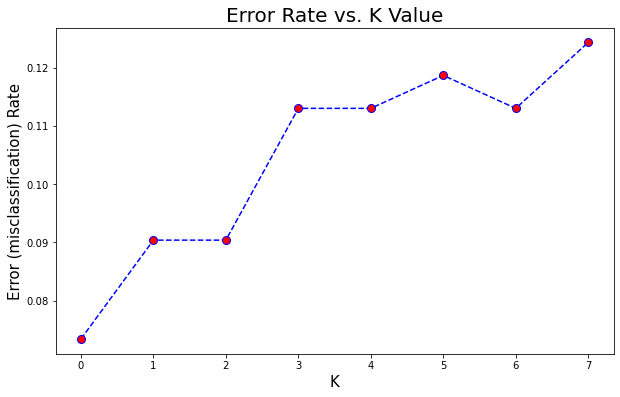

In [112]:
error_rate = []
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNN(n_neighbors=k)
    knn.fit(X_train, y_train) 
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
    # Compute traning and test data accuracy
    train_accuracy[i]=knn.score(X_train,y_train)
    test_accuracy[i]=knn.score(X_test,y_test)
plt.figure(figsize=(10,6))
plt.plot(range(0,k),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value', fontsize=20)
plt.xlabel('K',fontsize=15)
plt.ylabel('Error (misclassification) Rate',fontsize=15)

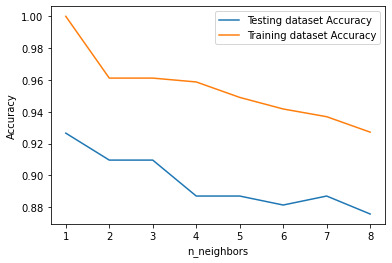

In [113]:
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [114]:
from sklearn.metrics import classification_report, confusion_matrix

In [129]:
print("Accuracy : ", metrics.accuracy_score(y_test,pred)*100)
print("Report : ", metrics.classification_report(y_test,pred, labels=np.unique(pred)))

Accuracy :  87.57062146892656
Report :                 precision    recall  f1-score   support

0=Blood Donor       0.91      1.00      0.95       151
  1=Hepatitis       0.00      0.00      0.00         8
   2=Fibrosis       0.33      0.50      0.40         4
  3=Cirrhosis       1.00      0.22      0.36         9

    micro avg       0.88      0.90      0.89       172
    macro avg       0.56      0.43      0.43       172
 weighted avg       0.86      0.90      0.86       172

